In [1]:
import numpy as np
import sobol_seq
import vorostereology as vs
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.spatial import Voronoi, voronoi_plot_2d
import voroplusplus as vpp
import pyvoro
from scipy import ndimage
import pandas as pd
import csv



In [2]:
%matplotlib widget

In [3]:
# ######################################## Define/ initialize points##############################################
n = 1000
s = np.random.default_rng().uniform(0,10,size=(n,3))

domain = [[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]]
weights = np.zeros(1000)

In [4]:
s10=s/10
domain10 = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

In [5]:
#######Generate 3D Voronoi###########
pycells=pyvoro.compute_voronoi(
s, # point positions
domain, # limits
10.0, # block size
# particle radii -- optional, and keyword-compatible arg.
)

In [6]:
pycells10=pyvoro.compute_voronoi(
s10, # point positions
domain10, # limits
1.0, # block size
# particle radii -- optional, and keyword-compatible arg.
)

In [7]:
######Taking 9 cross-sections#####

coeffs =  np.array([5.0, 0.0, 0.0])
r1=np.arange(2.5, 7.0, 0.5).tolist()
cross_section_tot = []
for x in range(len(r1)):
 cross_section_tot += [vs.compute_cross_section(coeffs=coeffs, offset = np.array([r1[x], 5.0, 10.0]), points = s, domain=domain, weights = weights)]
 

In [8]:
coeffs10 = np.array([0.5, 0.0, 0.0])
r1=np.arange(0.25, 0.7, 0.05).tolist()
cross_section_tot10 = []
for x in range(len(r1)):
 cross_section_tot10 += [vs.compute_cross_section(coeffs = coeffs10, offset =np.array([r1[x], 0.5, 1.0]), points = s10, domain=domain10, weights=weights)]
 

In [9]:
#####Taking the centroid of the visible grains in the cross-sections and create data-set#####
for j in range(8):
    centroidj = []
    for i in range(len(cross_section_tot[j]['2d'])):
        x = [p[0] for p in cross_section_tot[j]['2d'][i]]
        y = [p[1] for p in cross_section_tot[j]['2d'][i]]   
        centroidj.append((sum(x) / len(cross_section_tot[j]['2d'][i]), sum(y) / len(cross_section_tot[j]['2d'][i])))
    id_sec=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot[j]['2d']),columns=['id_sec'])
    id_grains=pd.DataFrame(cross_section_tot[j]['original_indices'],columns=['id_grain'])
    grain_area=pd.DataFrame(cross_section_tot[j]['areas'],columns=['g_area'])
    dfj=pd.DataFrame(centroidj,columns=['x','y'])
    dfj=pd.concat([dfj.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
    if j == 0:
        dfj_tot = dfj
    else:
        dfj_tot=pd.concat([df0,dfj])
    df0=dfj_tot   



In [10]:
df0.to_csv('dfprova1.csv')

In [11]:
for j in range(8):
    centroidj10 = []
    for i in range(len(cross_section_tot10[j]['2d'])):
        x10 = [p[0] for p in cross_section_tot10[j]['2d'][i]]
        y10 = [p[1] for p in cross_section_tot10[j]['2d'][i]]   
        centroidj10.append((sum(x10) / len(cross_section_tot10[j]['2d'][i]), sum(y10) / len(cross_section_tot10[j]['2d'][i])))
    id_sec10=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot10[j]['2d']),columns=['id_sec'])
    id_grains10=pd.DataFrame(cross_section_tot10[j]['original_indices'],columns=['id_grain'])
    grain_area10=pd.DataFrame(cross_section_tot10[j]['areas'],columns=['g_area'])
    dfj10=pd.DataFrame(centroidj10,columns=['x','y'])
    dfj10=pd.concat([dfj10.reset_index(drop=True), id_sec10, id_grains10,grain_area10], axis=1)
    if j == 0:
        dfj_tot10 = dfj10
    else:
        dfj_tot10=pd.concat([df010,dfj10])
    df010=dfj_tot10   




In [12]:
df010.to_csv('dfprova10.csv')

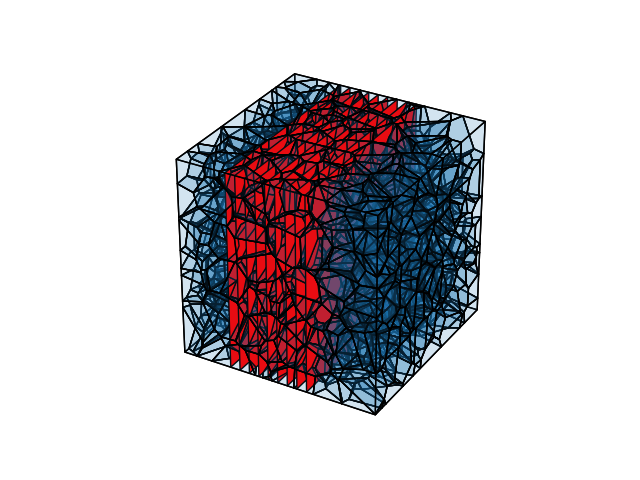

In [13]:
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

for cell_idx, cell in enumerate(pycells):
    for facet_idx, facet in enumerate(cell['faces']):
        idx = np.array(facet['vertices'])
        polygon = m3.art3d.Poly3DCollection([np.array(cell['vertices'])[idx]])
        polygon.set_edgecolor('k')
        polygon.set_alpha(0.1)
        ax.add_collection3d(polygon)

for x in range(9):
    for cell in cross_section_tot[x]['3d']:
        polygon = m3.art3d.Poly3DCollection([cell])
        polygon.set_color("red")
        polygon.set_edgecolor('k')
        ax.add_collection3d(polygon)

    
ax.set_xlim3d(domain[0])
ax.set_ylim3d(domain[1])
ax.set_zlim3d(domain[2])
ax.set_box_aspect((1, 1, 1))
ax.set_axis_off()
plt.show(block=False)



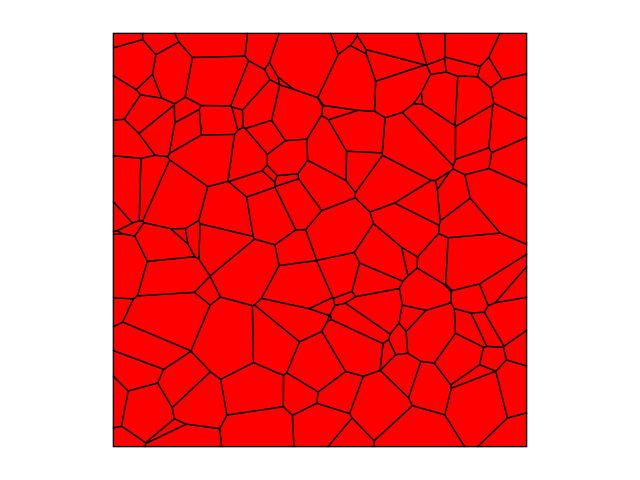

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

coll = PolyCollection(cross_section_tot[0]['2d'], facecolors="red", edgecolors='k')
ax2.add_collection(coll)
ax2.axis("equal")
ax2.set_axis_off()
fig2.tight_layout()
plt.show()




KeyboardInterrupt: 

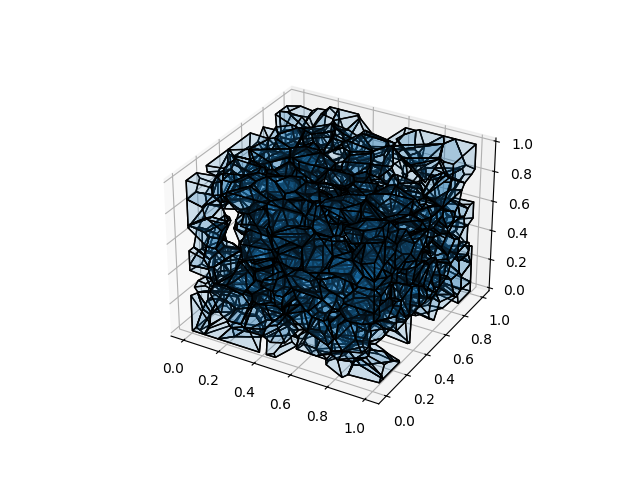

In [15]:
domain = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]] 
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

for cell_idx, cell in enumerate(pycells10):
    for facet_idx, facet in enumerate(cell['faces']):
        idx = np.array(facet['vertices'])
        polygon = m3.art3d.Poly3DCollection([np.array(cell['vertices'])[idx]])
        polygon.set_edgecolor('k')
        polygon.set_alpha(0.1)
        ax.add_collection3d(polygon)


for x in range(0, 9, 1):
    for cell in cross_section_tot10[x]['3d']:
        polygon = m3.art3d.Poly3DCollection([cell])
        polygon.set_color("red")
        polygon.set_edgecolor('k')
        ax.add_collection3d(polygon)
    
ax.set_xlim3d(domain[0])
ax.set_ylim3d(domain[1])
ax.set_zlim3d(domain[2])
ax.set_box_aspect((1, 1, 1))
ax.set_axis_off()
plt.show()




(-0.05, 1.05)


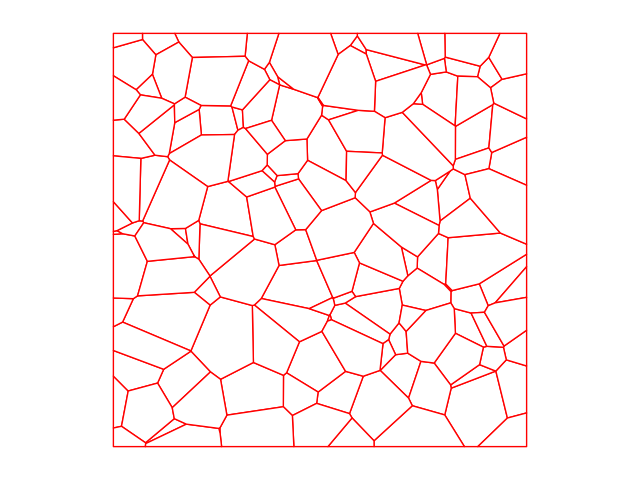

/tmp/ipykernel_875/3794413269.py:14: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  PIL.Image.frombytes("RGB", fig2.canvas.get_width_height(), fig2.canvas.tostring_rgb()).crop((115,35,505,445)).save("../figures/tot10_0_2d.png")


In [19]:
import PIL
import PIL.Image

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

coll = PolyCollection(cross_section_tot10[0]['2d'], facecolors="white", edgecolors='r')
ax2.add_collection(coll)
ax2.axis("equal")
print(ax2.get_xlim())
ax2.set_axis_off()
fig2.tight_layout()
plt.show()
PIL.Image.frombytes("RGB", fig2.canvas.get_width_height(), fig2.canvas.tostring_rgb()).crop((115,35,505,445)).save("../figures/tot10_0_2d.png")


In [23]:
cross_section_tot10[0]["2d"][0]

array([[ 0.91893525, -0.5       ],
       [ 0.90167717, -0.5       ],
       [ 0.9220282 , -0.41902691],
       [ 0.94281349, -0.43503558]])

In [19]:
dfx_tot.to_csv('dftotvor1.csv')

NameError: name 'dfx_tot' is not defined

In [34]:
#########Generazione multipla######
dfj_tot_tot=pd.DataFrame(columns=['x','y','id_sec','id_grain','g_area','id_vor'])
for k in range(1,100):
    s = np.random.default_rng().uniform(0,10,size=(100,3))
    pycells=pyvoro.compute_voronoi(
    s, [[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]], 1000.0,)
    coeffs = np.array([5.0, 0.0, 0.0])
    r1=np.arange(0.2, 1, 0.1).tolist()
    cross_section_tot=[vs.compute_cross_section(coeffs = coeffs, offset = np.array([0.1+5.0, 5.0, 10.0]), points=s, domain=[[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]], weights=weights)]
    for x in range(0,8):
     cross_section_tot+= [vs.compute_cross_section(coeffs = coeffs, offset = np.array([r1[x]+5.0, 5.0, 10.0]), points=s, domain=[[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]], weights=weights)]
    x = [p[0] for p in cross_section_tot[0]['2d'][0]]
    y = [p[1] for p in cross_section_tot[0]['2d'][0]]
    centroid0=[(sum(x) / len(cross_section_tot[0]['2d'][0]), sum(y) / len(cross_section_tot[0]['2d'][0]))]
    for i in range(1,len(cross_section_tot[0]['2d'])):
         x = [p[0] for p in cross_section_tot[0]['2d'][i]]
         y = [p[1] for p in cross_section_tot[0]['2d'][i]]
         centroid0.append((sum(x) / len(cross_section_tot[0]['2d'][i]), sum(y) / len(cross_section_tot[0]['2d'][i])))
    id_sec=pd.DataFrame([0.1]*len(cross_section_tot[0]['2d']),columns=['id_sec'])
    id_grains=pd.DataFrame(cross_section_tot[0]['original_indices'],columns=['id_grain'])
    grain_area=pd.DataFrame(cross_section_tot[0]['areas'],columns=['g_area'])
    df0=pd.DataFrame(centroid0,columns=['x','y'])
    df0=pd.concat([df0.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
    for j in range(1,8):
        x = [p[0] for p in cross_section_tot[j]['2d'][0]]
        y = [p[1] for p in cross_section_tot[j]['2d'][0]]
        centroidj=[(sum(x) / len(cross_section_tot[j]['2d'][0]), sum(y) / len(cross_section_tot[j]['2d'][0]))]
        for i in range(1,len(cross_section_tot[j]['2d'])):
            x = [p[0] for p in cross_section_tot[j]['2d'][i]]
            y = [p[1] for p in cross_section_tot[j]['2d'][i]]   
            centroidj.append((sum(x) / len(cross_section_tot[j]['2d'][i]), sum(y) / len(cross_section_tot[j]['2d'][i])))
        id_sec=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot[j]['2d']),columns=['id_sec'])
        id_grains=pd.DataFrame(cross_section_tot[j]['original_indices'],columns=['id_grain'])
        grain_area=pd.DataFrame(cross_section_tot[j]['areas'],columns=['g_area'])
        dfj=pd.DataFrame(centroidj,columns=['x','y'])
        dfj=pd.concat([dfj.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
        dfj_tot=pd.concat([df0,dfj])
        df0=dfj_tot   
    id_vor=pd.DataFrame([k]*dfj_tot.shape[0],columns=['id_vor'])
    dfj_tot=pd.concat([dfj_tot.reset_index(drop=True), id_vor], axis=1)   
    dfj_tot=pd.concat([dfj_tot ,dfj_tot_tot])
    dfj_tot_tot=dfj_tot 
    


/tmp/ipykernel_5324/1500187300.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfj_tot=pd.concat([dfj_tot ,dfj_tot_tot])


In [35]:
dfj_tot_tot

,x,y,id_sec,id_grain,g_area,id_vor
0,8.668276,-3.192797,0.1,53,5.631424,99
1,8.877768,-4.694075,0.1,48,1.366599,99
2,6.886871,-0.544753,0.1,31,0.097539,99
3,8.016879,0.419846,0.1,78,5.653518,99
4,8.425815,-1.096038,0.1,30,3.724209,99
...,...,...,...,...,...,...
282,0.702759,-0.439836,0.8,67,0.657104,1
283,0.242714,4.495346,0.8,7,0.479724,1
284,1.735436,4.637171,0.8,34,1.874793,1
285,1.324869,2.636939,0.8,43,3.353642,1
